# **Data Preprocessing**

In [2]:
# ================================
# STEP 1: IMPORT REQUIRED LIBRARIES
# ================================
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# ================================
# STEP 2: LOAD THE EXCEL FILE
# ================================
file_path = '/content/Crop_recommendation.csv'  # Update this if needed
df = pd.read_csv(file_path)

# ================================
# STEP 3: CHECK FOR MISSING VALUES
# ================================
print("🔍 Missing values before imputation:")
print(df.isnull().sum())

# ================================
# STEP 4: HANDLE MISSING VALUES (Median Imputation)
# ================================
# Columns to check: Soil nutrients (N, P, K), pH, temperature, humidity, rainfall
cols_to_impute = ['N', 'P', 'K', 'ph', 'temperature', 'humidity', 'rainfall']

for col in cols_to_impute:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)
    print(f"✅ Filled missing values in '{col}' with median: {median_val}")

print("\n✅ All missing values filled.\n")

# ================================
# STEP 5: FEATURE SCALING (Min-Max Normalization)
# ================================
scaler = MinMaxScaler()
df[cols_to_impute] = scaler.fit_transform(df[cols_to_impute])

print("✅ Features normalized using Min-Max Scaling:")
print(df[cols_to_impute].head())

# ================================
# STEP 6: ENCODE CATEGORICAL LABELS (Crop Types)
# ================================

# Method 1: Label Encoding (for classification models)
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Optional: Save mapping for reference
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\n✅ Crop label encoded mapping:")
print(label_mapping)

# Method 2: One-Hot Encoding (for analysis/ML models that benefit from OHE)
df_onehot = pd.get_dummies(df, columns=['label'], prefix='crop')

# Display result
print("\n📊 Final preprocessed dataset (head):")
print(df_onehot.head())

# ================================
# (Optional) Save Preprocessed Data
# ================================
# df_onehot.to_csv('/content/preprocessed_crop_data.csv', index=False)


🔍 Missing values before imputation:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
✅ Filled missing values in 'N' with median: 37.0
✅ Filled missing values in 'P' with median: 51.0
✅ Filled missing values in 'K' with median: 32.0
✅ Filled missing values in 'ph' with median: 6.425
✅ Filled missing values in 'temperature' with median: 25.6
✅ Filled missing values in 'humidity' with median: 80.47
✅ Filled missing values in 'rainfall' with median: 94.86500000000001

✅ All missing values filled.

✅ Features normalized using Min-Max Scaling:
          N         P      K        ph  temperature  humidity  rainfall
0  0.642857  0.264286  0.190  0.465839     0.345768  0.790247  0.656476
1  0.607143  0.378571  0.180  0.549689     0.371306  0.770649  0.741692
2  0.428571  0.357143  0.195  0.673913     0.406600  0.793980  0.875696
3  0.528571  0.214286  0.175  0.540373     0.506743  0.768782  0.799

/tmp/ipython-input-2-3555118947.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


# **Data Analysis**

📊 Descriptive statistics by crop type:


N                                       P            \
                 mean    median       min       max      mean    median   
label                                                                     
apple        0.148571  0.171429  0.000000  0.285714  0.923000  0.939286   
banana       0.715929  0.717857  0.571429  0.857143  0.550071  0.542857   
blackgram    0.285857  0.292857  0.142857  0.428571  0.446214  0.442857   
chickpea     0.286357  0.278571  0.142857  0.428571  0.448500  0.450000   
coconut      0.157000  0.171429  0.000000  0.285714  0.085214  0.075000   
coffee       0.722857  0.735714  0.571429  0.857143  0.169571  0.171429   
cotton       0.841214  0.835714  0.714286  1.000000  0.294571  0.292857   
grapes       0.165571  0.171429  0.000000  0.285714  0.910929  0.914286   
jute         0.560000  0.557143  0.428571  0.714286  0.299000  0.292857   
kidneybeans  0.148214  0.157143  0.000000  0.285714  0.446714  0.442857   
lentil       0.134071  0.117857  0.000000  0.285714  0.452571  0.450000   
maize        0.555429  0.542857  0.428571  0.714286  0.310286  0.310714   
mango        0.143357  0.150000  0.000000  0.285714  0.158429  0.160714   
mothbeans    0.153143  0.157143  0.000000  0.285714  0.307214  0.310714   
mungbean     0.149929  0.157143  0.000000  0.285714  0.302000  0.300000   
muskmelon    0.716571  0.714286  0.571429  0.857143  0.090857  0.092857   
orange       0.139857  0.135714  0.000000  0.285714  0.082500  0.078571   
papaya       0.356286  0.350000  0.221429  0.500000  0.386071  0.392857   
pigeonpeas   0.148071  0.142857  0.000000  0.285714  0.448071  0.460714   
pomegranate  0.134786  0.128571  0.000000  0.285714  0.098214  0.107143   
rice         0.570643  0.571429  0.428571  0.707143  0.304143  0.300000   
watermelon   0.710143  0.707143  0.571429  0.857143  0.085714  0.089286   

                                       K          ...  humidity            \
                  min       max     mean  median  ...       min       max   
label                                             ...                       
apple        0.821429  1.000000  0.97445  0.9750  ...  0.883924  0.940971   
banana       0.464286  0.642857  0.22525  0.2250  ...  0.708936  0.825012   
blackgram    0.357143  0.535714  0.07120  0.0700  ...  0.534414  0.649790   
chickpea     0.357143  0.535714  0.37460  0.3700  ...  0.000000  0.066612   
coconut      0.000000  0.178571  0.12795  0.1300  ...  0.883808  1.000000   
coffee       0.071429  0.250000  0.12470  0.1250  ...  0.417522  0.649673   
cotton       0.214286  0.392857  0.07280  0.0700  ...  0.708703  0.823845   
grapes       0.821429  1.000000  0.97555  0.9800  ...  0.767149  0.813346   
jute         0.214286  0.392857  0.17495  0.1750  ...  0.660523  0.882291   
kidneybeans  0.357143  0.535714  0.07525  0.0750  ...  0.044680  0.124942   
lentil       0.357143  0.535714  0.07205  0.0700  ...  0.534648  0.649323   
maize        0.214286  0.392857  0.07395  0.0750  ...  0.478535  0.706603   
mango        0.071429  0.250000  0.12460  0.1250  ...  0.358843  0.474802   
mothbeans    0.214286  0.392857  0.07615  0.0750  ...  0.300397  0.591461   
mungbean     0.214286  0.392857  0.07435  0.0750  ...  0.767266  0.883574   
muskmelon    0.000000  0.178571  0.22540  0.2250  ...  0.883808  0.941437   
orange       0.000000  0.178571  0.02505  0.0250  ...  0.883691  0.941437   
papaya       0.292857  0.464286  0.22520  0.2250  ...  0.884041  0.941204   
pigeonpeas   0.357143  0.535714  0.07645  0.0750  ...  0.188287  0.646640   
pomegranate  0.000000  0.178571  0.17605  0.1750  ...  0.826762  0.941904   
rice         0.214286  0.392857  0.17435  0.1750  ...  0.768315  0.824895   
watermelon   0.000000  0.178571  0.22610  0.2275  ...  0.767266  0.883341   

                   ph                                rainfall            \
                 mean    median       min       max      mean    median   
label                                                               


🔗 Correlation Matrix:
                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026501  0.190687  0.096761   
P           -0.231460  1.000000  0.736232    -0.127538 -0.118732 -0.138022   
K           -0.140512  0.736232  1.000000    -0.160389  0.190860 -0.169477   
temperature  0.026501 -0.127538 -0.160389     1.000000  0.205326 -0.017919   
humidity     0.190687 -0.118732  0.190860     0.205326  1.000000 -0.008502   
ph           0.096761 -0.138022 -0.169477    -0.017919 -0.008502  1.000000   
rainfall     0.059021 -0.063840 -0.053461    -0.030082  0.094418 -0.109167   

             rainfall  
N            0.059021  
P           -0.063840  
K           -0.053461  
temperature -0.030082  
humidity     0.094418  
ph          -0.109167  
rainfall     1.000000  


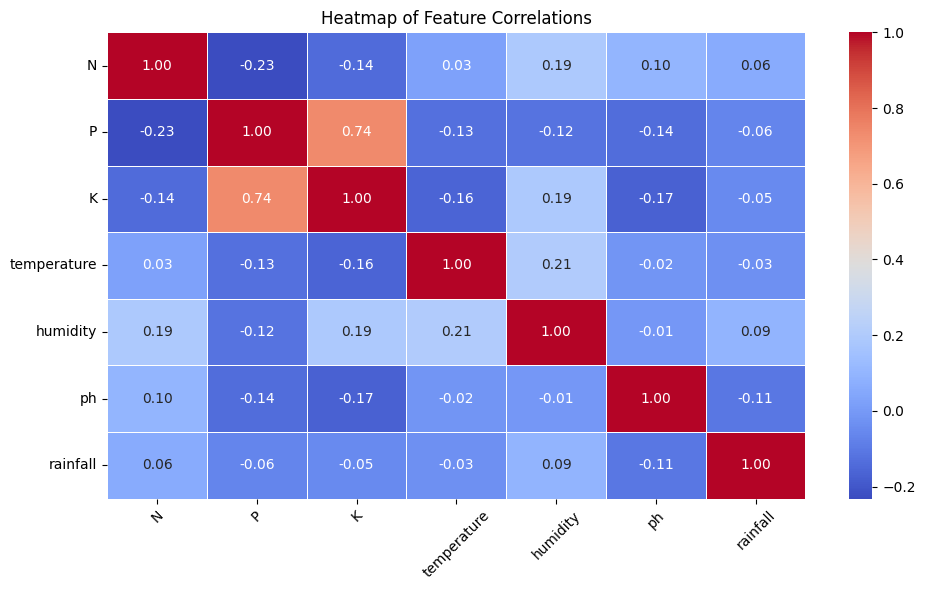

In [4]:
# ================================
# STEP 7: DESCRIPTIVE STATISTICS (Grouped by Crop Type)
# ================================

# Continuous feature columns (after scaling)
continuous_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Group by original crop label (not the encoded one)
desc_stats = df.groupby('label')[continuous_features].agg(['mean', 'median', 'min', 'max'])

print("📊 Descriptive statistics by crop type:")
display(desc_stats)

# ================================
# STEP 8: CORRELATION ANALYSIS
# ================================

# Compute correlation matrix (only for continuous features)
correlation_matrix = df[continuous_features].corr()

print("\n🔗 Correlation Matrix:")
print(correlation_matrix)

# (Optional) Visualize correlation matrix using heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#To save the descriptive stats to CSV
#desc_stats.to_csv('/content/descriptive_statistics_by_crop.csv')


#  DATA VISUALIZATION





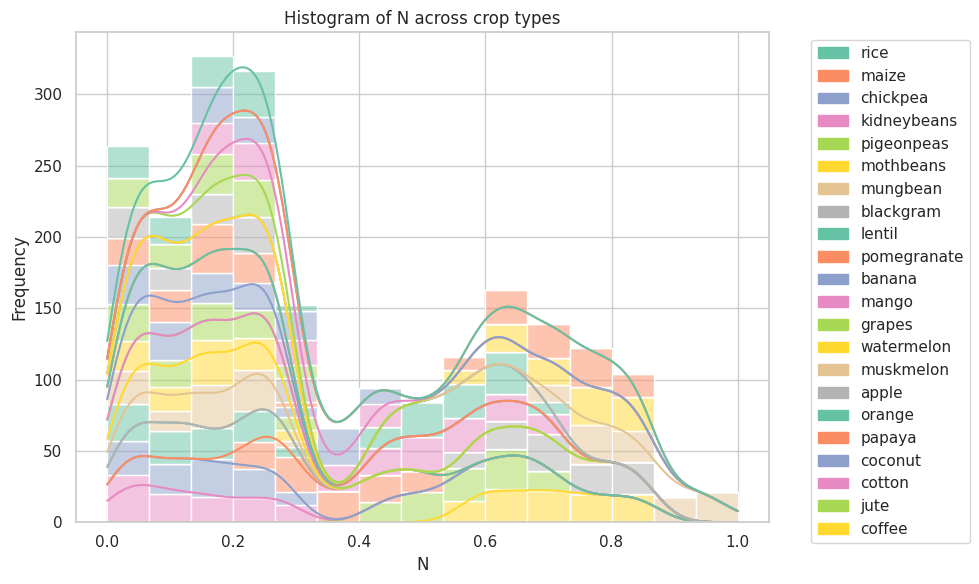

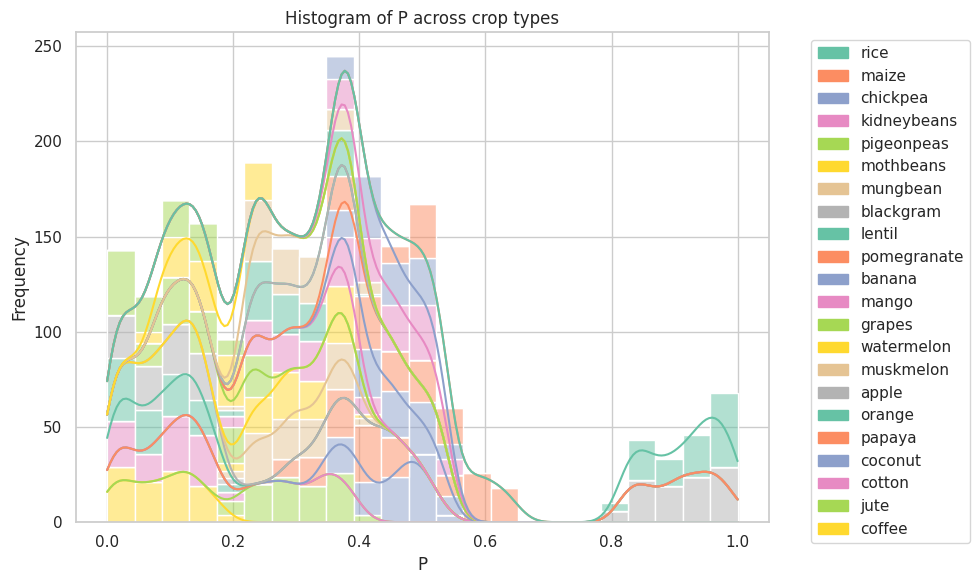

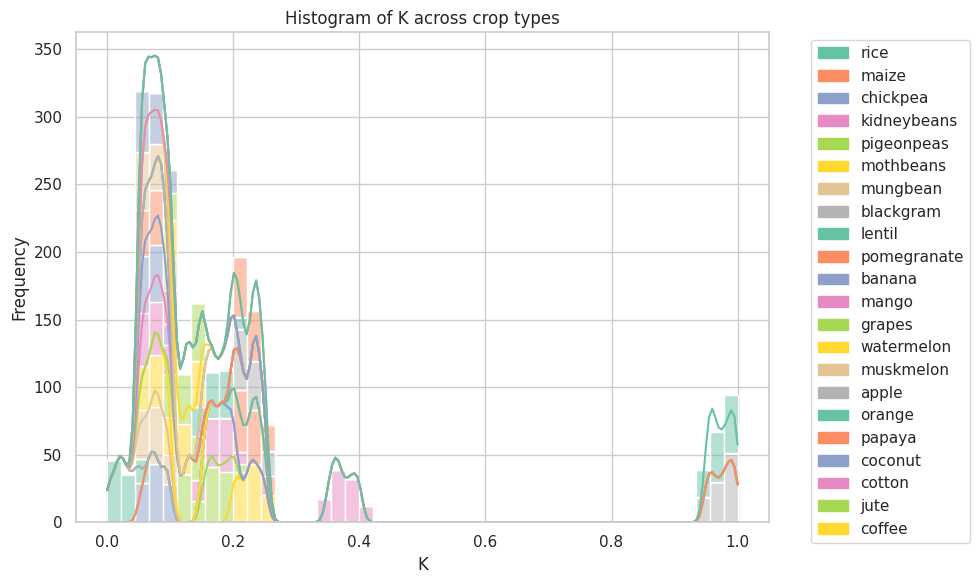

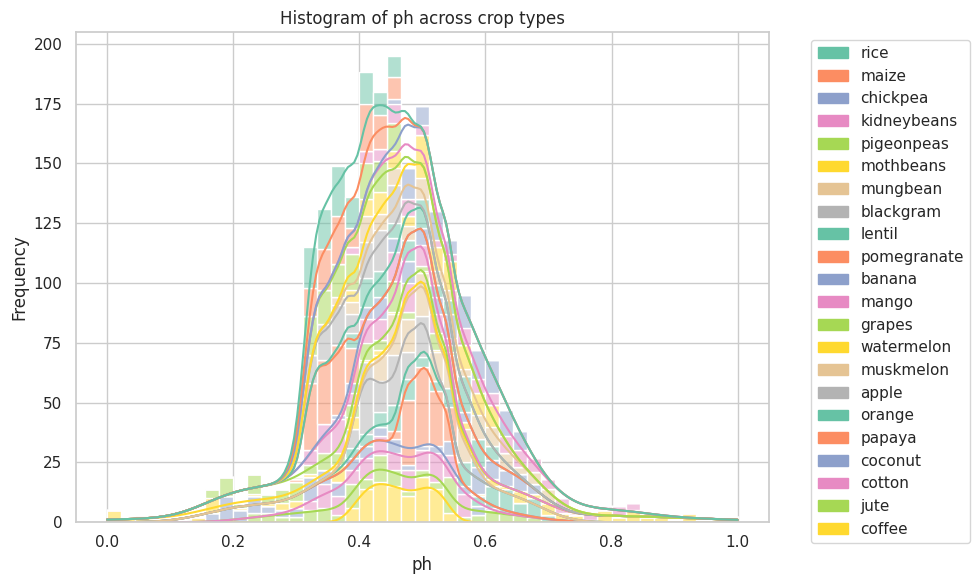

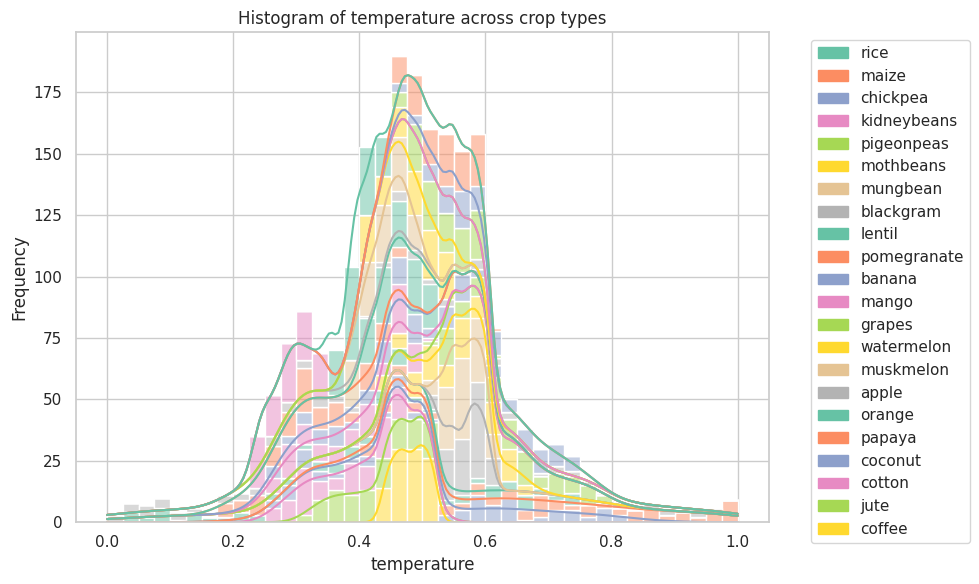

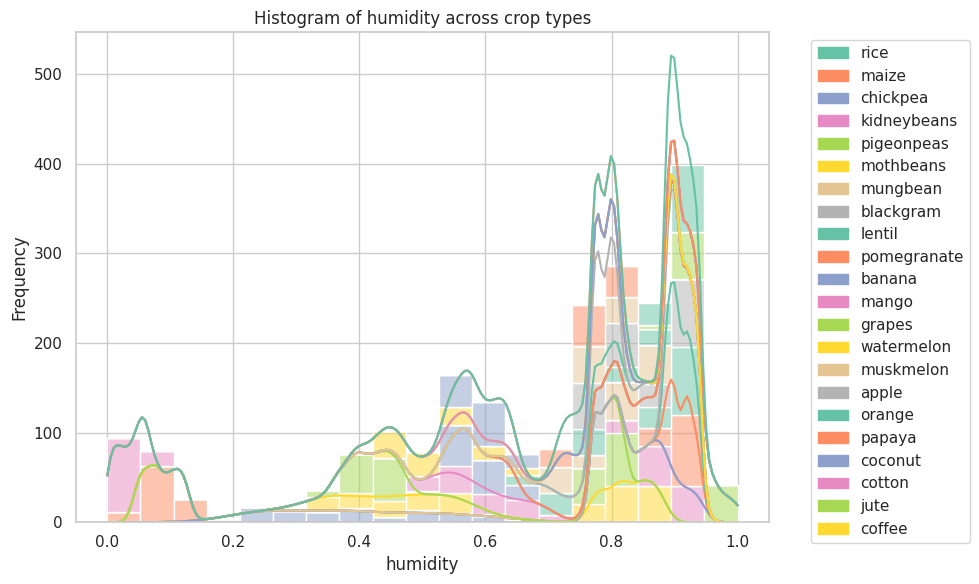

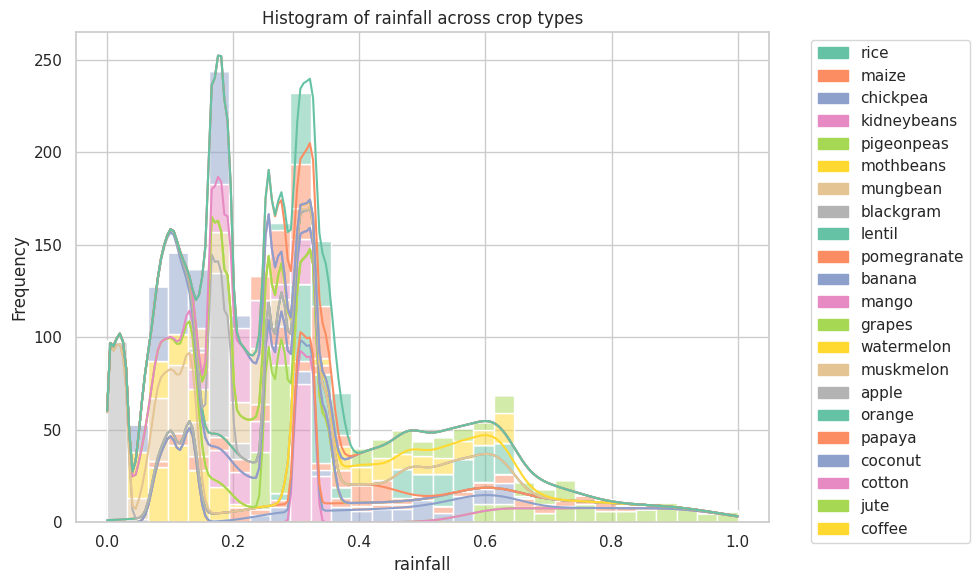

/tmp/ipython-input-37-53882226.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y=col, hue=None, palette='Pastel1')


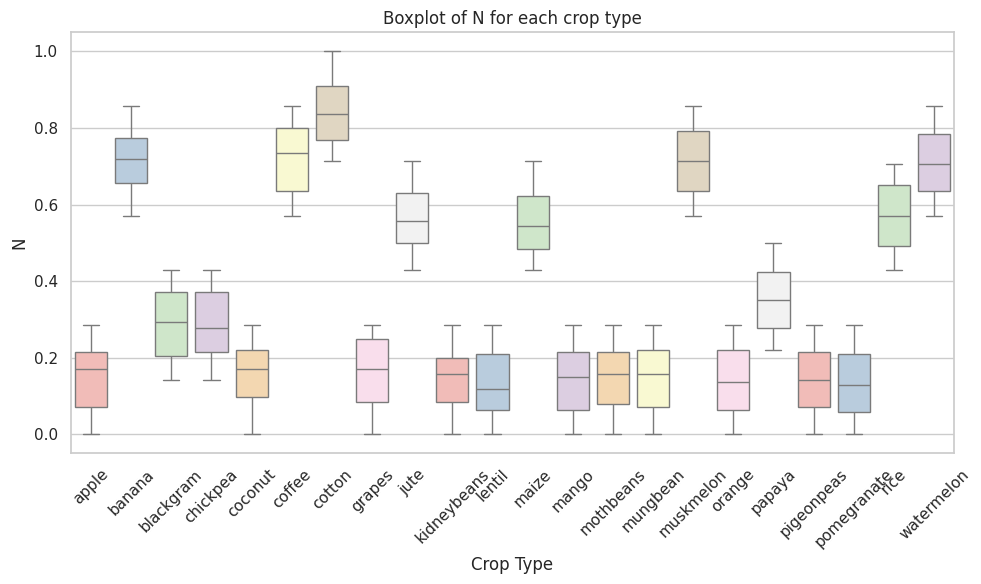

/tmp/ipython-input-37-53882226.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y=col, hue=None, palette='Pastel1')


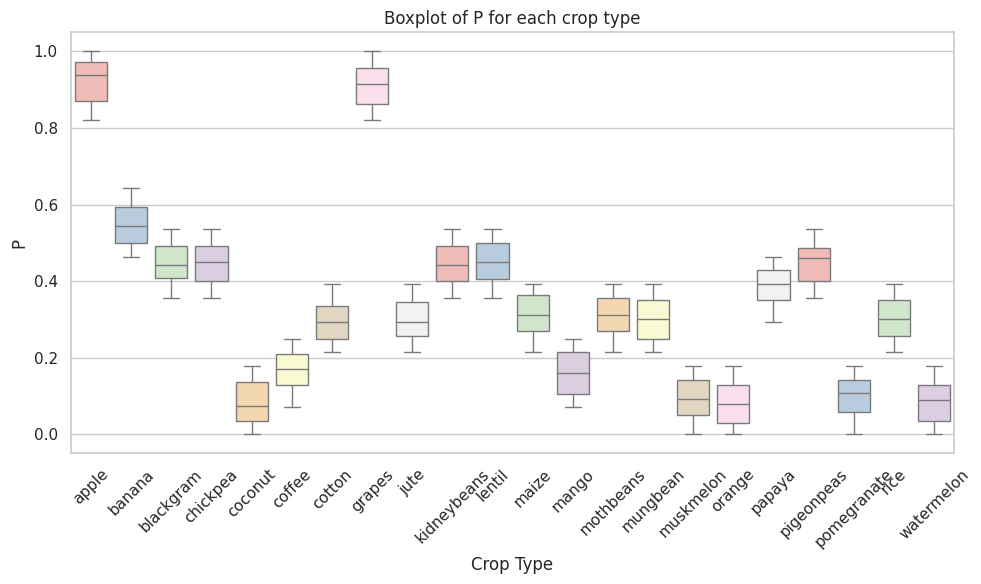

/tmp/ipython-input-37-53882226.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y=col, hue=None, palette='Pastel1')


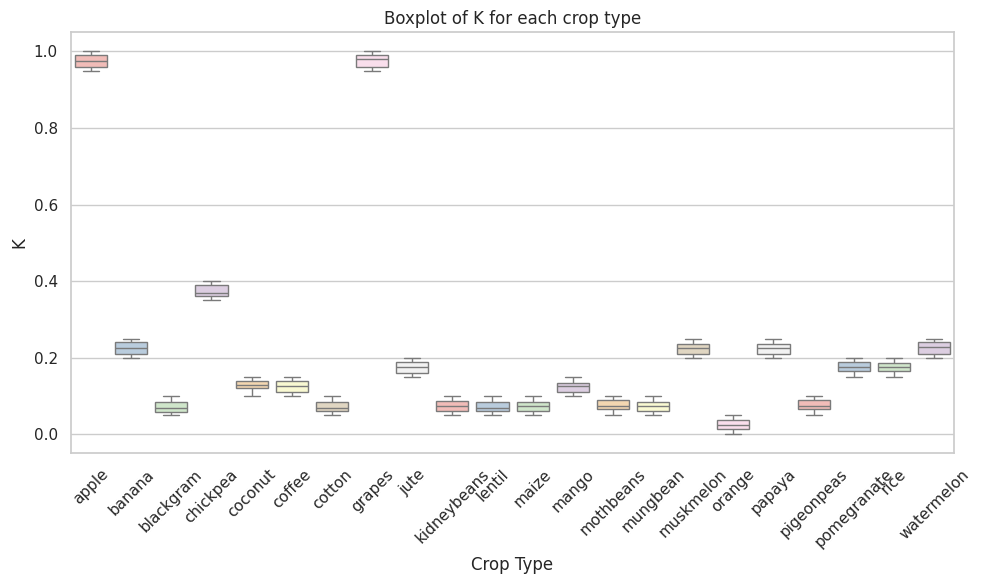

/tmp/ipython-input-37-53882226.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y=col, hue=None, palette='Pastel1')


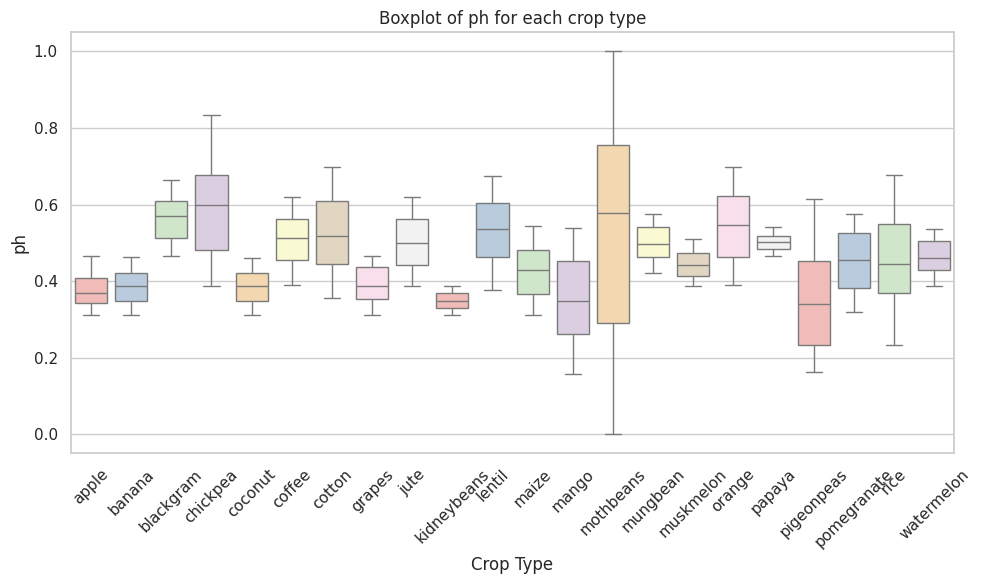

/tmp/ipython-input-37-53882226.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y=col, hue=None, palette='Pastel1')


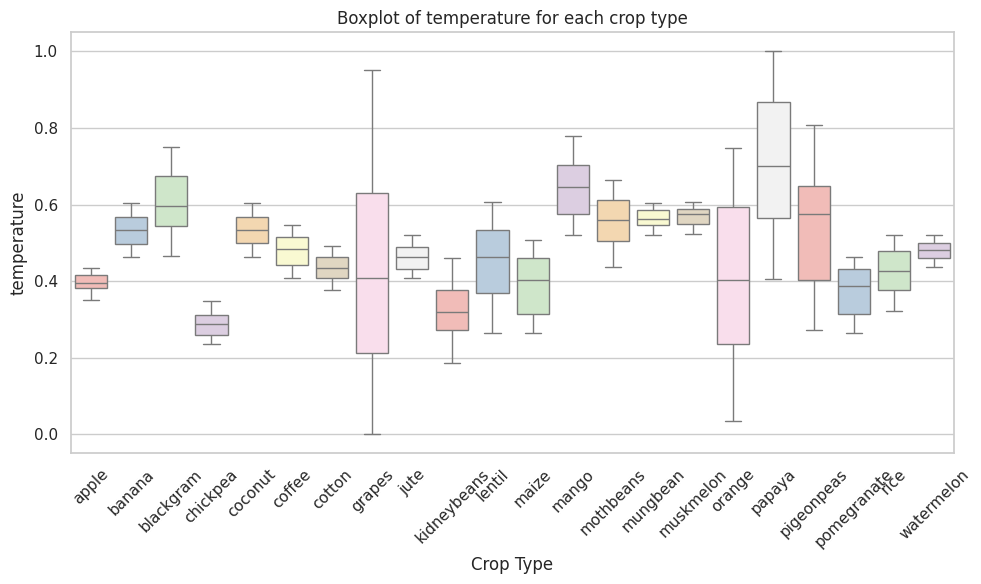

/tmp/ipython-input-37-53882226.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y=col, hue=None, palette='Pastel1')


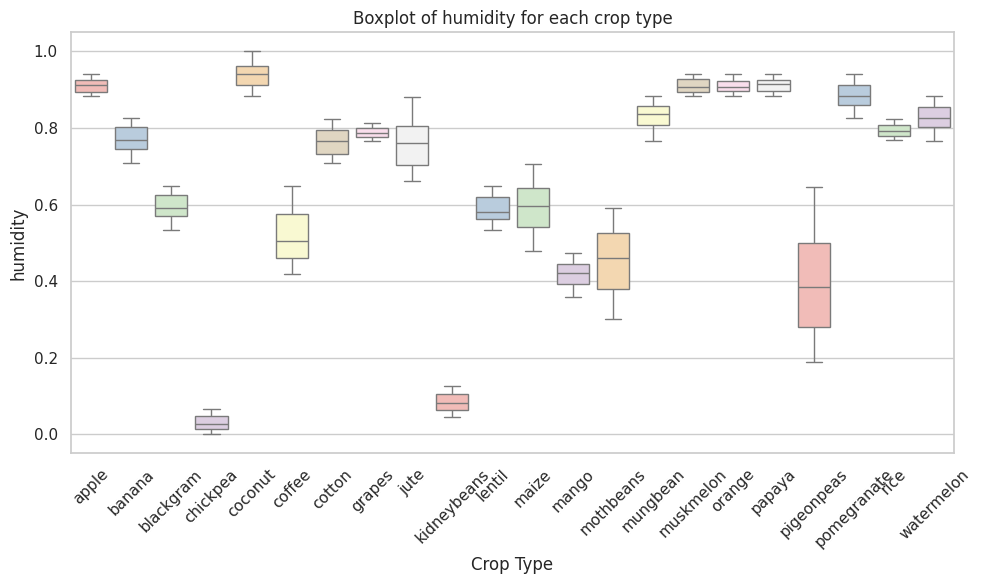

/tmp/ipython-input-37-53882226.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y=col, hue=None, palette='Pastel1')


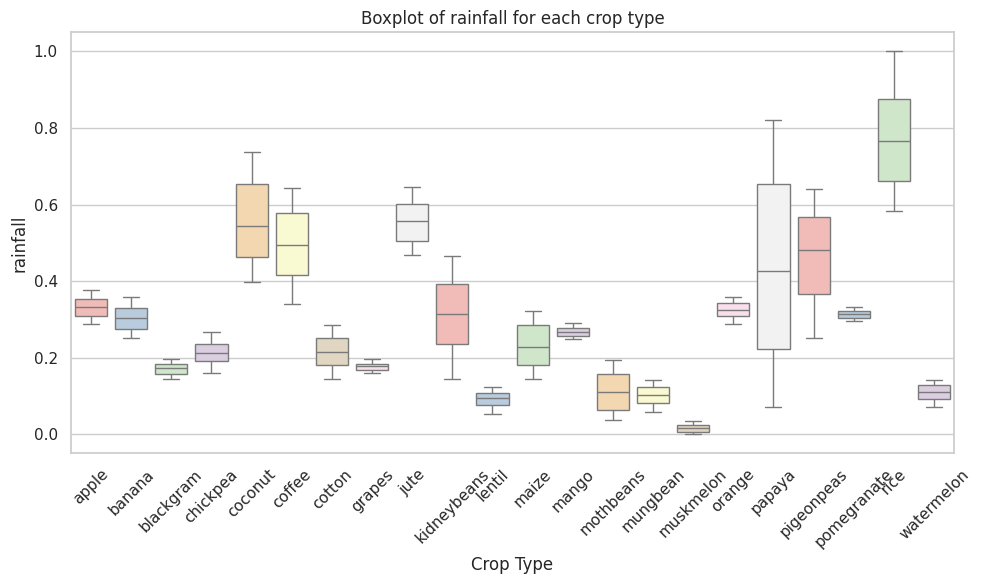

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # Import for creating proxy artists

# Ensure inline plotting
%matplotlib inline
sns.set(style="whitegrid")

# Continuous features to plot
features = ['N', 'P', 'K', 'ph', 'temperature', 'humidity', 'rainfall']

# Get unique crop labels and a color palette
unique_labels = df['label'].unique()
colors = sns.color_palette('Set2', n_colors=len(unique_labels))
label_color_map = dict(zip(unique_labels, colors))

# HISTOGRAMS
for col in features:
    plt.figure(figsize=(10, 6))
    # Use the histplot without hue for now, we will add the legend manually
    sns.histplot(data=df, x=col, kde=True, multiple='stack', palette='Set2', hue='label')
    plt.title(f"Histogram of {col} across crop types")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    # Create proxy artists for the legend
    legend_patches = [mpatches.Patch(color=label_color_map[label], label=label)
                      for label in unique_labels]

    # Add the legend using the proxy artists
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

# BOXPLOTS (existing code, no change needed for the legend issue)
for col in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='label', y=col, hue=None, palette='Pastel1')
    plt.title(f"Boxplot of {col} for each crop type")
    plt.xlabel("Crop Type")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

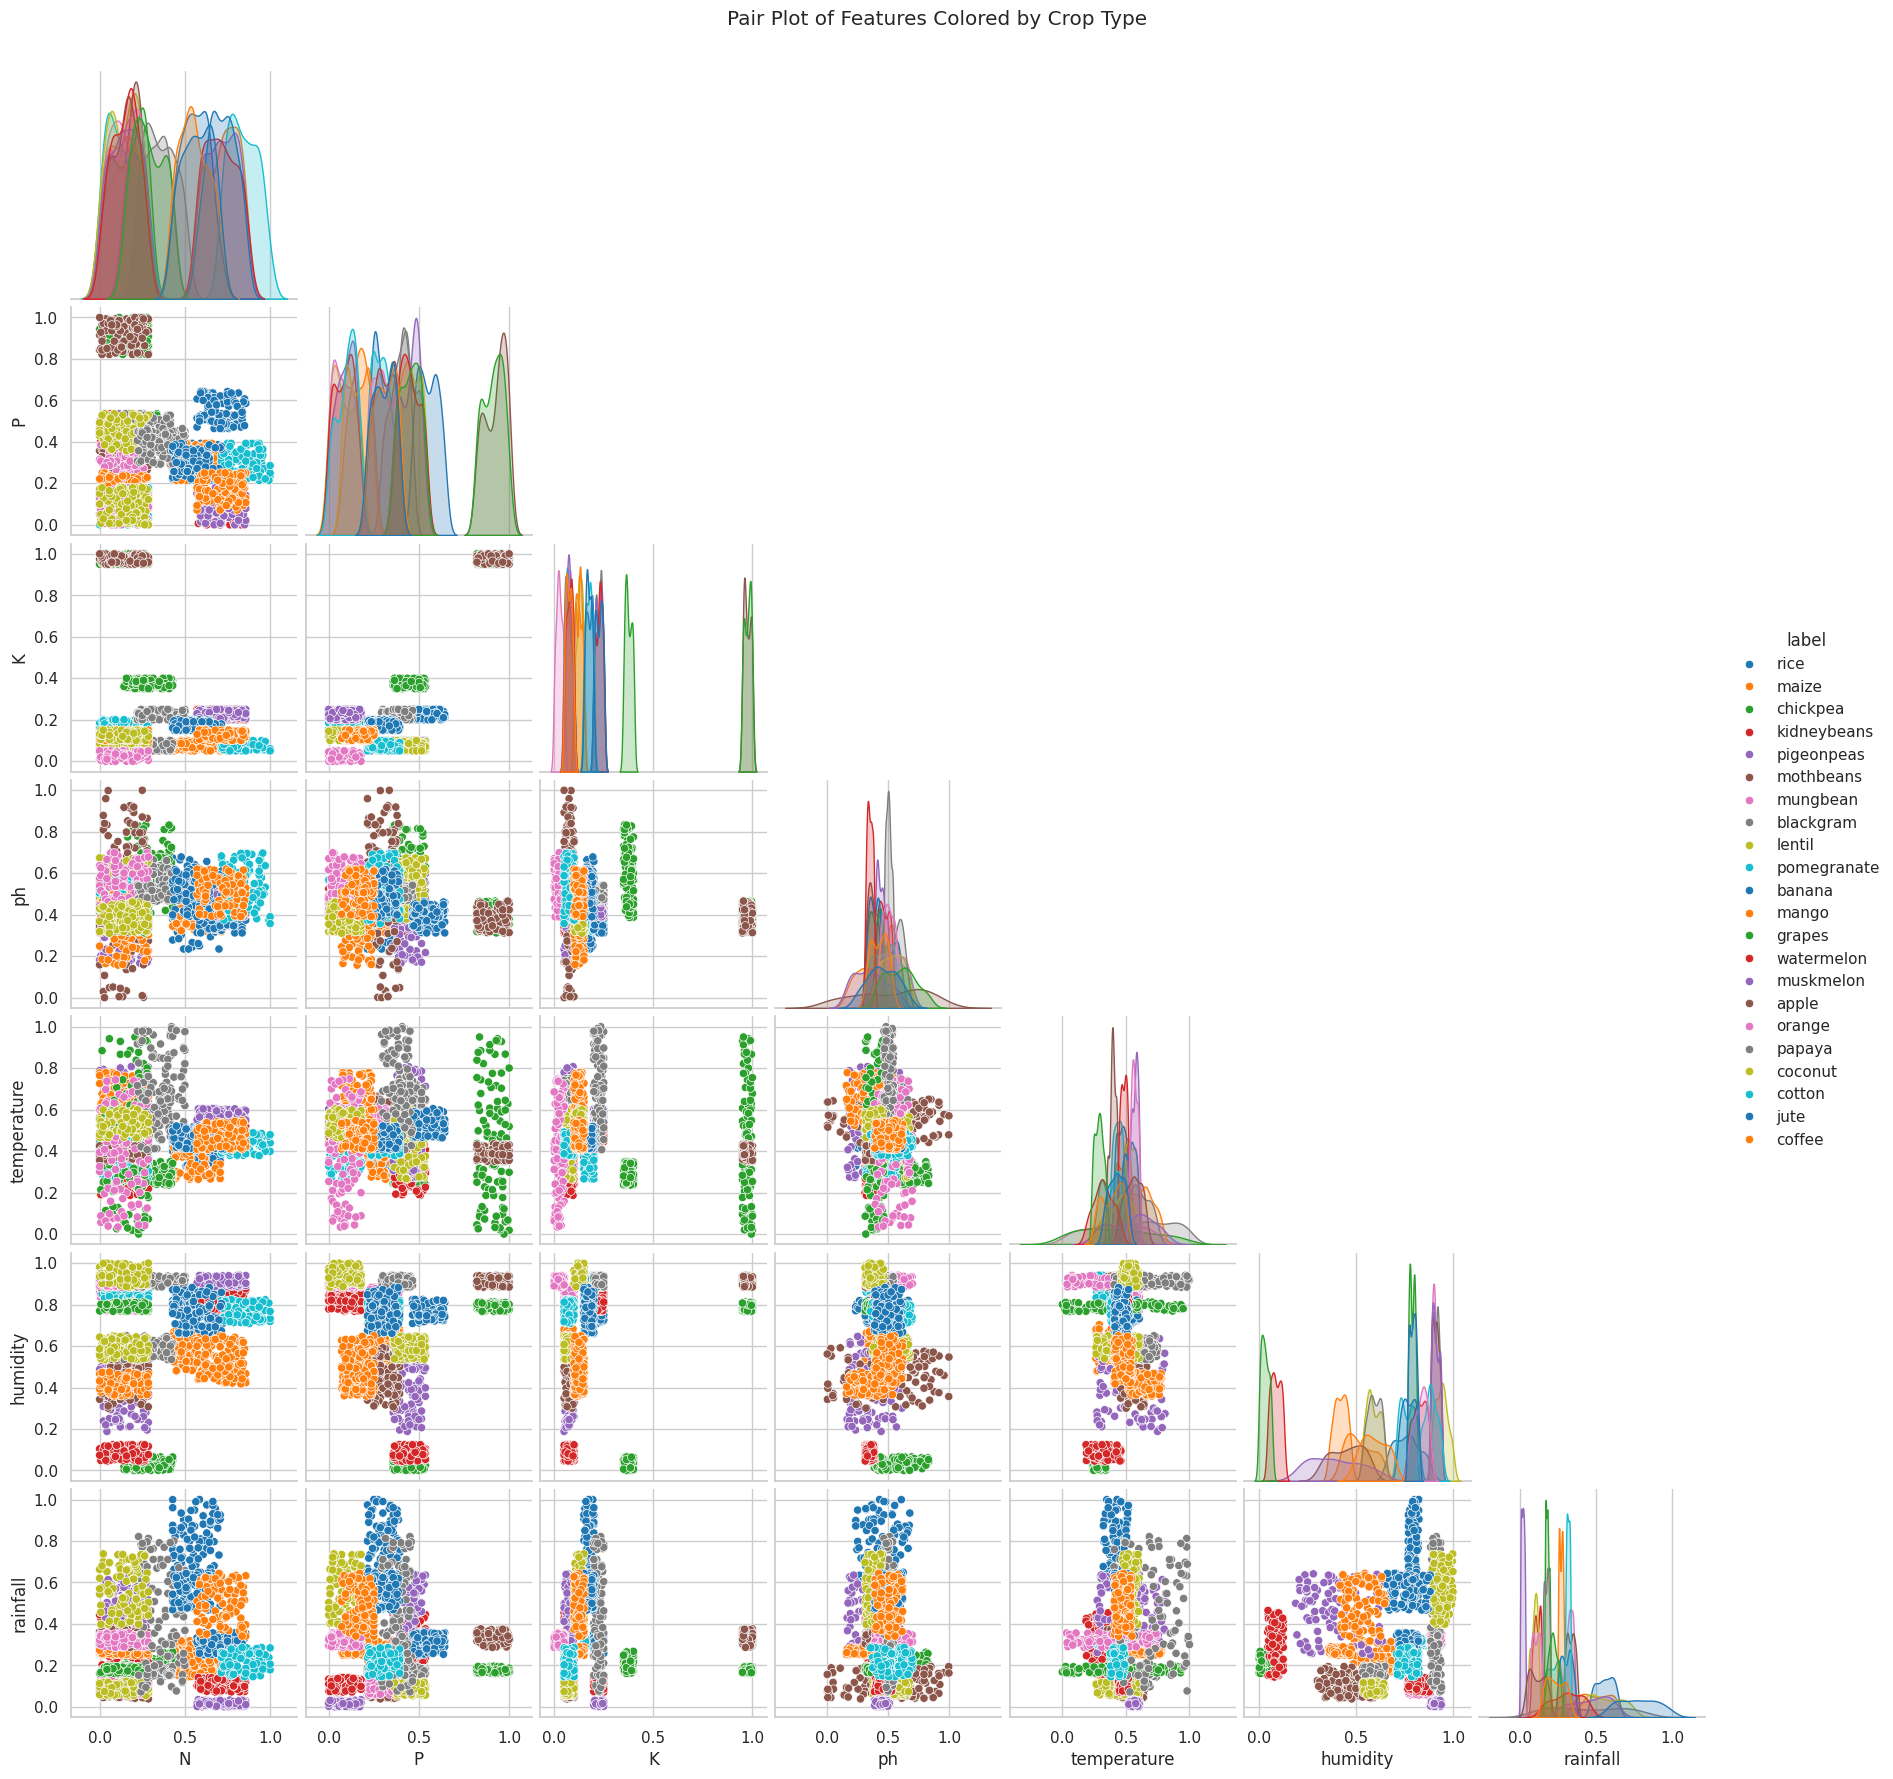

In [7]:
# Select only the features and label for pairplot
pairplot_df = df[features + ['label']]

# PAIRPLOT
sns.pairplot(pairplot_df, hue='label', palette='tab10', corner=True, diag_kind='kde')
plt.suptitle("Pair Plot of Features Colored by Crop Type", y=1.02)
plt.show()


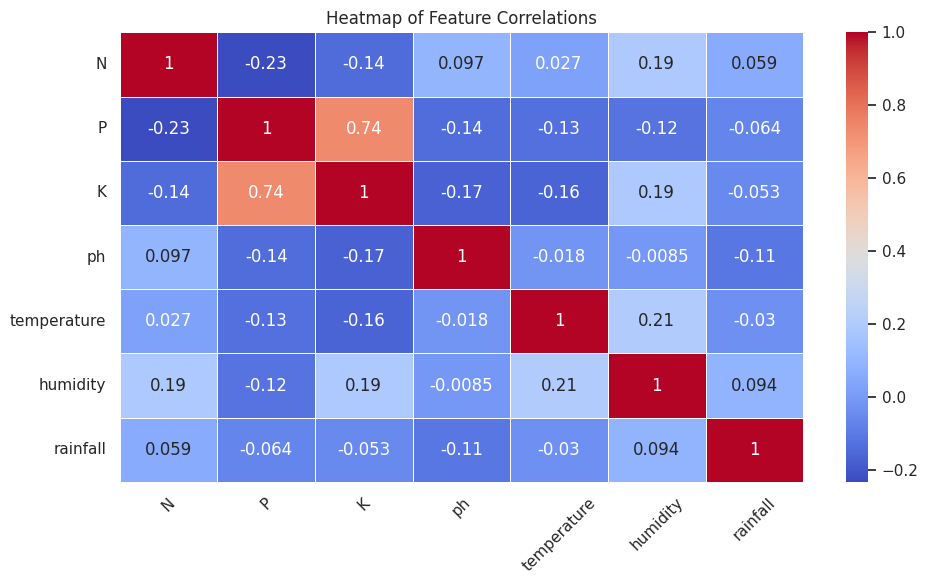

In [10]:
# Compute correlation matrix
corr_matrix = df[features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


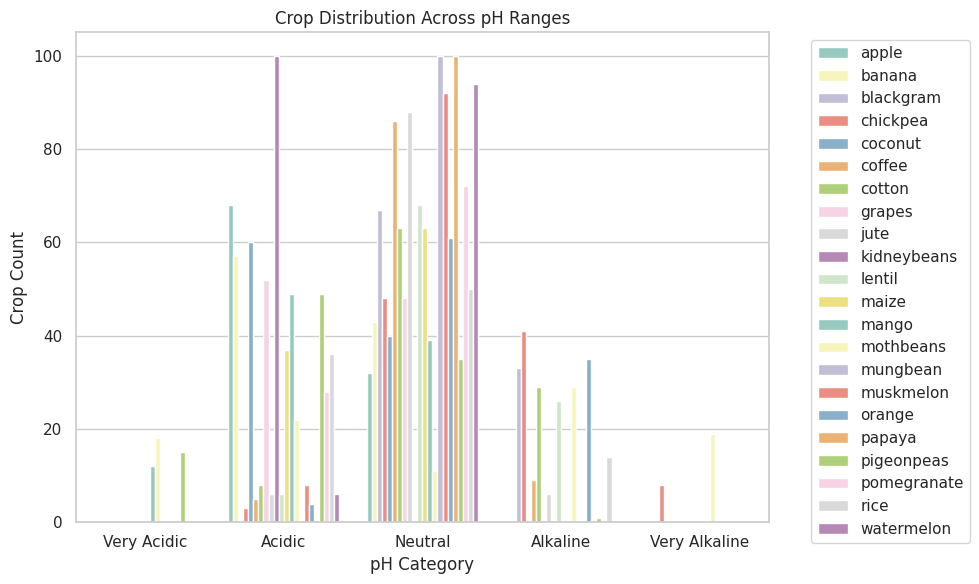

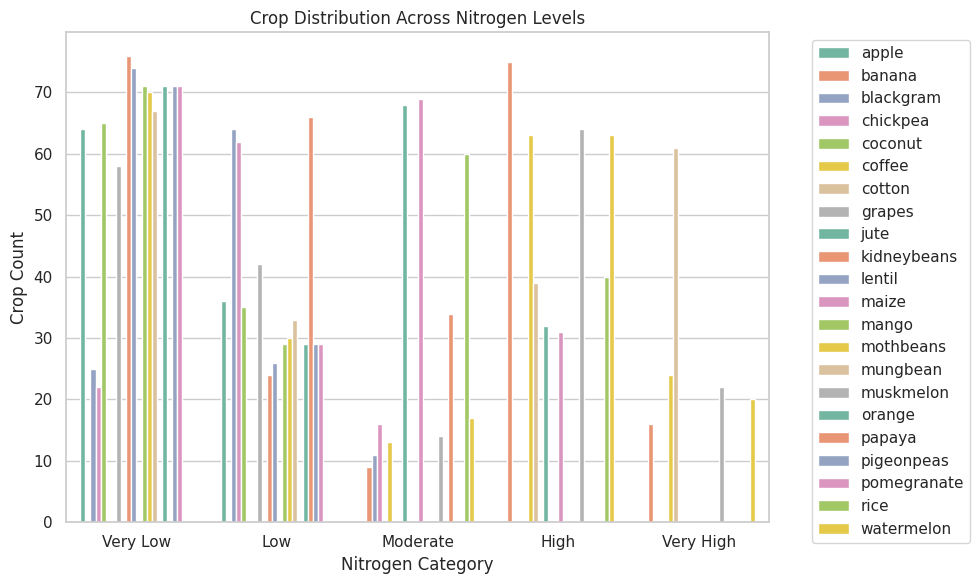

In [36]:
# Bin ph into categories
df['ph_bin'] = pd.cut(df['ph'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
                      labels=['Very Acidic', 'Acidic', 'Neutral', 'Alkaline', 'Very Alkaline'])

# Bin N into categories
df['N_bin'] = pd.cut(df['N'], bins=5, labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])

# Bar chart for pH
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ph_bin', hue='label', palette='Set3')
plt.title("Crop Distribution Across pH Ranges")
plt.xlabel("pH Category")
plt.ylabel("Crop Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Add legend to the right
plt.tight_layout()
plt.show()

# Bar chart for Nitrogen
plt.figure(figsize=(10,6 ))
sns.countplot(data=df, x='N_bin', hue='label', palette='Set2')
plt.title("Crop Distribution Across Nitrogen Levels")
plt.xlabel("Nitrogen Category")
plt.ylabel("Crop Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Add legend to the right
plt.tight_layout()
plt.show()

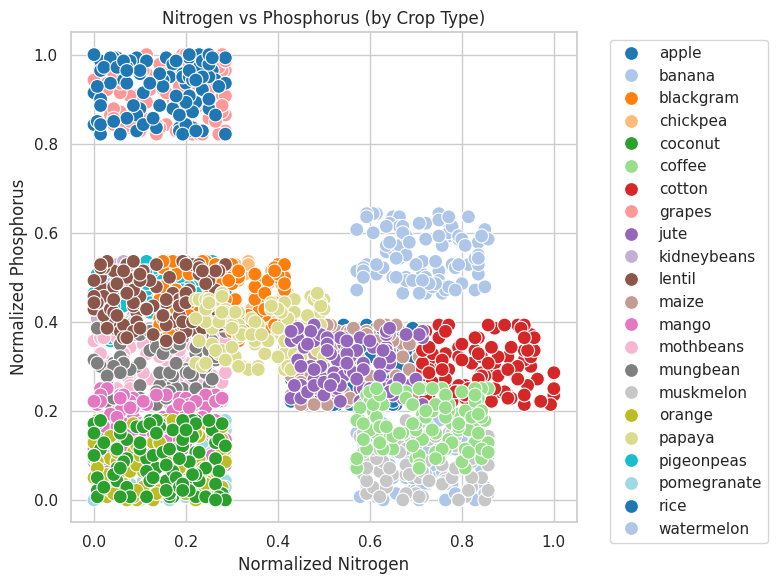

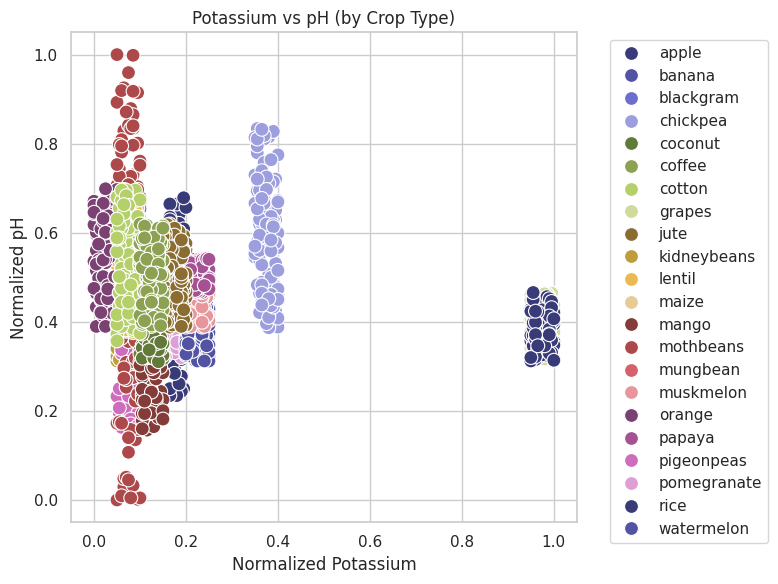

In [41]:
# Nitrogen vs. Phosphorus
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='N', y='P', hue='label', palette='tab20', s=100) # Changed palette to tab20
plt.title("Nitrogen vs Phosphorus (by Crop Type)")
plt.xlabel("Normalized Nitrogen")
plt.ylabel("Normalized Phosphorus")
# Place legend outside and to the right of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Potassium vs. pH
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='K', y='ph', hue='label', palette='tab20b', s=100) # Changed palette to tab20b
plt.title("Potassium vs pH (by Crop Type)")
plt.xlabel("Normalized Potassium")
plt.ylabel("Normalized pH")
# Place legend outside and to the right of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **Classification**

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:21:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔍 === Random Forest ===
🎯 Accuracy: 1.00
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      

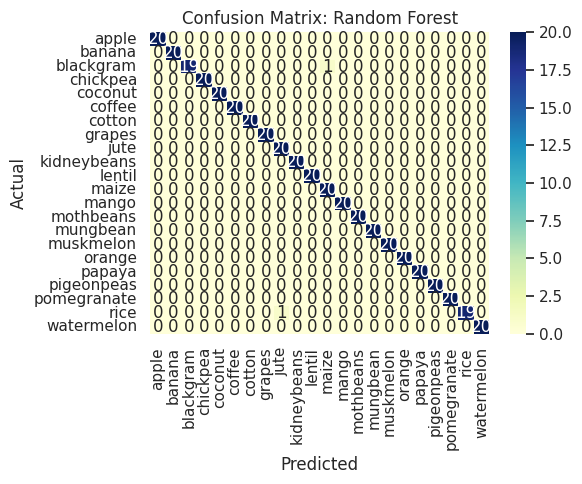


🔍 === XGBoost ===
🎯 Accuracy: 0.99
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.90      0.95        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.98        20
    mungbean       0.95      1.00      0.98        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00  

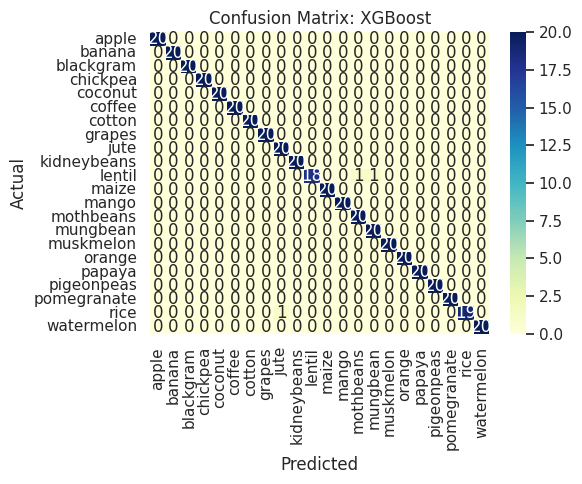


🔍 === SVM ===
🎯 Accuracy: 0.98
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
        jute       0.80      1.00      0.89        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      0.95      0.97        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00      

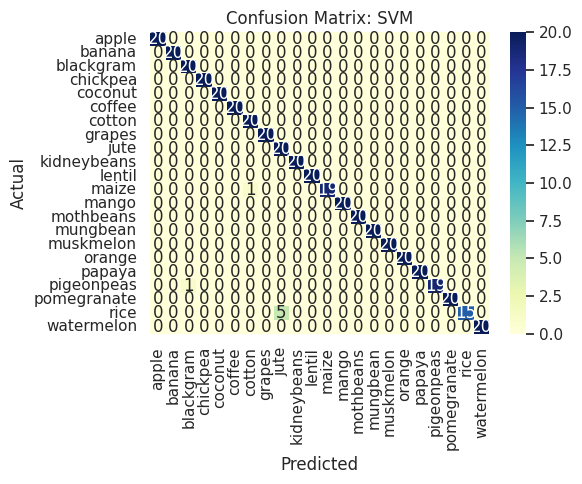

/tmp/ipython-input-50-2899890703.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


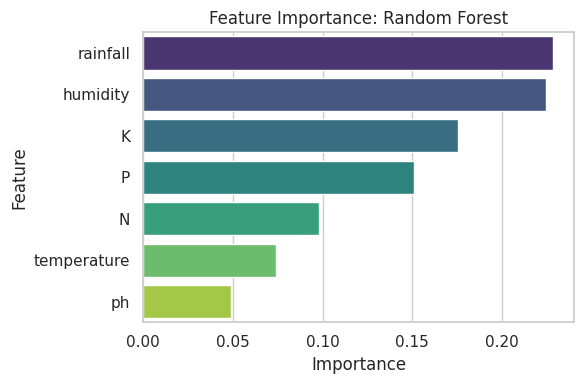

/tmp/ipython-input-50-2899890703.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


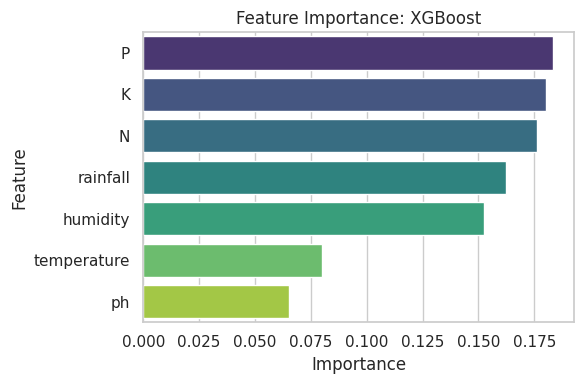

In [50]:
# ===============================
# 📦 STEP 1: Import Libraries
# ===============================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ===============================
# 📥 STEP 2: Load Your Dataset
# ===============================
# Change this to your actual file path in Colab (e.g., from drive/MyDrive/... or upload manually)
file_path = '/content/Crop_recommendation.csv'
df = pd.read_csv(file_path)

# ===============================
# 🧹 STEP 3: Preprocess Data
# ===============================
# Encode target crop label
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])  # assuming column is named 'label'

# Define features and target
feature_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
X = df[feature_cols]
y = df['label_encoded']

# ===============================
# 🔀 STEP 4: Train-Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# ===============================
# 🌲 STEP 5: Train Models
# ===============================

# --- Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# --- XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# --- SVM (RBF kernel)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# ===============================
# 📊 STEP 6: Evaluate Models
# ===============================
models = {'Random Forest': rf_model, 'XGBoost': xgb_model, 'SVM': svm_model}

for name, model in models.items():
    print(f"\n🔍 === {name} ===")
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"🎯 Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# ===============================
# 📈 STEP 7: Feature Importance (RF & XGB)
# ===============================
def plot_importance(model, name):
    try:
        importances = model.feature_importances_
        importance_df = pd.DataFrame({
            'Feature': feature_cols,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(6, 4))
        sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
        plt.title(f"Feature Importance: {name}")
        plt.tight_layout()
        plt.show()
    except AttributeError:
        print(f"⚠️ {name} does not support feature_importances_")

plot_importance(rf_model, "Random Forest")
plot_importance(xgb_model, "XGBoost")


In [61]:
# Run this in Colab to install missing packages
!pip install xgboost scikit-learn pandas matplotlib seaborn


In [66]:
# === IMPORTS ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

# === STEP 1: Load dataset ===
# Replace with your actual path
file_path = '/content/Crop_recommendation.csv'
df = pd.read_csv(file_path)

# === STEP 2: Handle Missing Values ===
df.fillna(df.median(numeric_only=True), inplace=True)

# === STEP 3: Encode Target (crop type) ===
label_encoder = LabelEncoder()
df['crop_encoded'] = label_encoder.fit_transform(df['label'])  # assumes 'label' is the target column

# === STEP 4: Feature Scaling ===
features = ['N', 'P', 'K', 'ph', 'temperature', 'humidity', 'rainfall']  # adjust to your actual column names
X = df[features]
y = df['crop_encoded']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === STEP 5: Split Data ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# === STEP 6: Train Models ===
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
svm_model = SVC(kernel='rbf', probability=True)

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# === STEP 7: Evaluate Models ===
models = {'Random Forest': rf_model, 'XGBoost': xgb_model, 'SVM': svm_model}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'\n{name} Accuracy: {acc:.2f}')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# === STEP 8: Use Combined Model (Choose one) ===
# Let's say XGBoost performed the best
best_model = xgb_model  # or rf_model / svm_model




Random Forest Accuracy: 0.99
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0 22  0  0  0  0  0  0  0  0]
 [ 0

In [67]:
# === STEP 9: Predict Crop for User Input ===
def predict_crop():
    print("\nEnter soil and weather parameters:")
    n = float(input("Nitrogen (N): "))
    p = float(input("Phosphorus (P): "))
    k = float(input("Potassium (K): "))
    ph = float(input("pH: "))
    temp = float(input("Temperature (°C): "))
    hum = float(input("Humidity (%): "))
    rain = float(input("Rainfall (mm): "))

    input_data = np.array([[n, p, k, ph, temp, hum, rain]])
    input_scaled = scaler.transform(input_data)
    prediction = best_model.predict(input_scaled)
    crop_label = label_encoder.inverse_transform(prediction)

    print(f"\n✅ Recommended Crop: {crop_label[0]}")

# Call this function to run prediction
predict_crop()



Enter soil and weather parameters:
Nitrogen (N): 77
Phosphorus (P): 57
Potassium (K): 21
pH: 6.6
Temperature (°C): 25
Humidity (%): 75
Rainfall (mm): 80

✅ Recommended Crop: maize


In [68]:
import joblib
joblib.dump(best_model, 'crop_predictor_model.pkl')


['crop_predictor_model.pkl']

In [70]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)
model = joblib.load("crop_predictor_model.pkl")  # Trained model

@app.route('/predict', methods=['POST'])
def predict_crop():
    data = request.get_json()
    features = np.array([[
        data['Nitrogen'],
        data['Phosphorus'],
        data['Potassium'],
        data['pH'],
        data['Temperature'],
        data['Humidity'],
        data['Rainfall']
    ]])
    prediction = model.predict(features)[0]
    return jsonify({'recommended_crop': prediction})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
